In [24]:
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt
import pprint as pp
import networkx as nx
import scipy

In [2]:
def draw_graph(G, colors=None):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    if(colors is not None):
        nx.draw(G, pos, node_color=colors)
    else:
        nx.draw(G, pos)

def draw_graph_wlabels(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

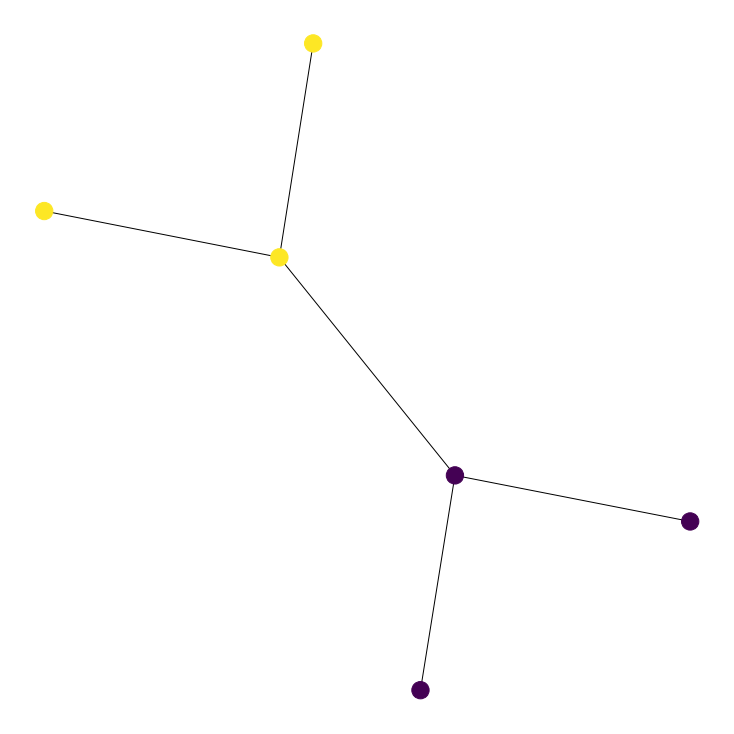

In [3]:
adj = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
])
sc = SpectralClustering(2, affinity='precomputed', n_init=100, assign_labels='discretize')
r = sc.fit_predict(adj)
g = nx.from_numpy_array(adj)
draw_graph(g, r)

/home/anupa/miniconda3/envs/wbase/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


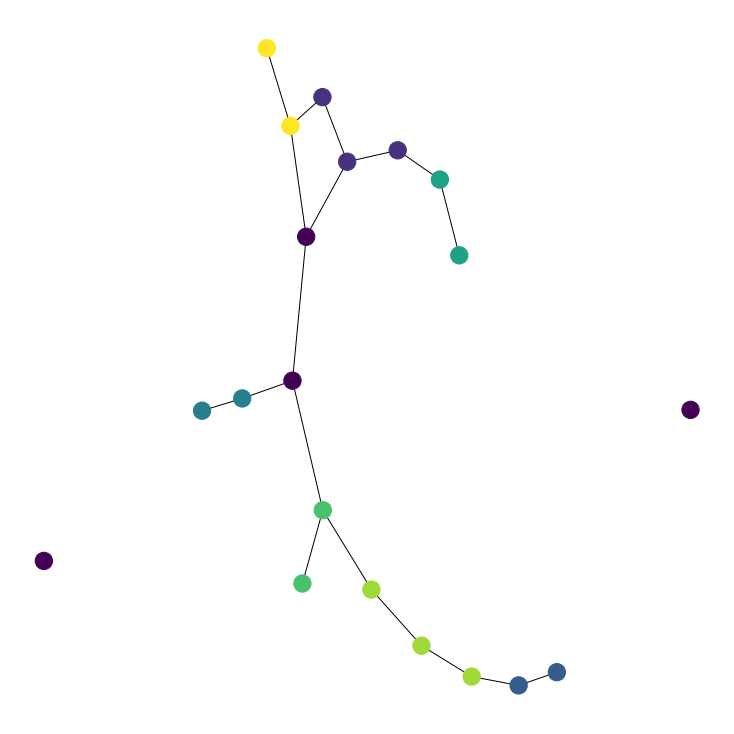

In [4]:
g = nx.fast_gnp_random_graph(20, 0.1)
adj = nx.adj_matrix(g)
sc = SpectralClustering(8, affinity='precomputed', n_init=10, assign_labels='discretize')
r = sc.fit_predict(adj)

# x = [0 for i in range(100)]
# for v in r:
#     x[v] = 1
# print(x)
draw_graph(g, r)

In [39]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    print(type(a))
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def UnnormalizedSpectral(W, nc=2):
    assert(check_symmetric(W))
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    
    e, v = scipy.linalg.eigh(L)
    idx = e.argsort()
    e = e[idx]
    v = v[:,idx]

    U = np.array(v[:, :nc])
    km = KMeans(init='k-means++', n_clusters=nc)
    r = km.fit_predict(U)
    return r

<class 'numpy.matrix'>


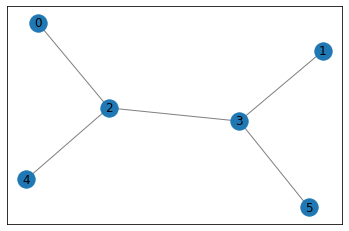

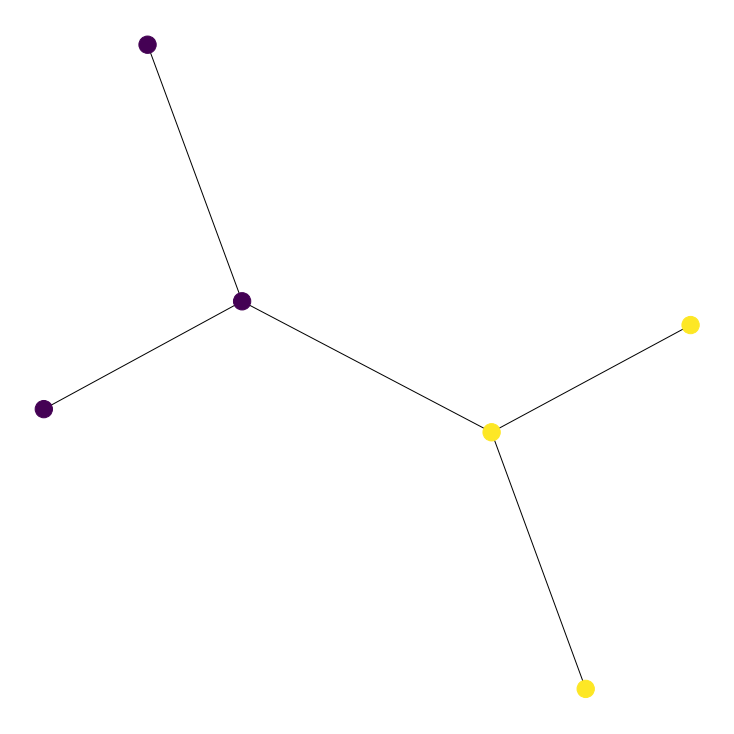

In [42]:
adj = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
])
g = nx.from_numpy_array(adj)
draw_graph_wlabels(g)
r = UnnormalizedSpectral(nx.adj_matrix(g).todense(), 2)
draw_graph(g, r)

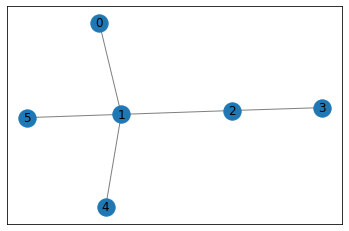

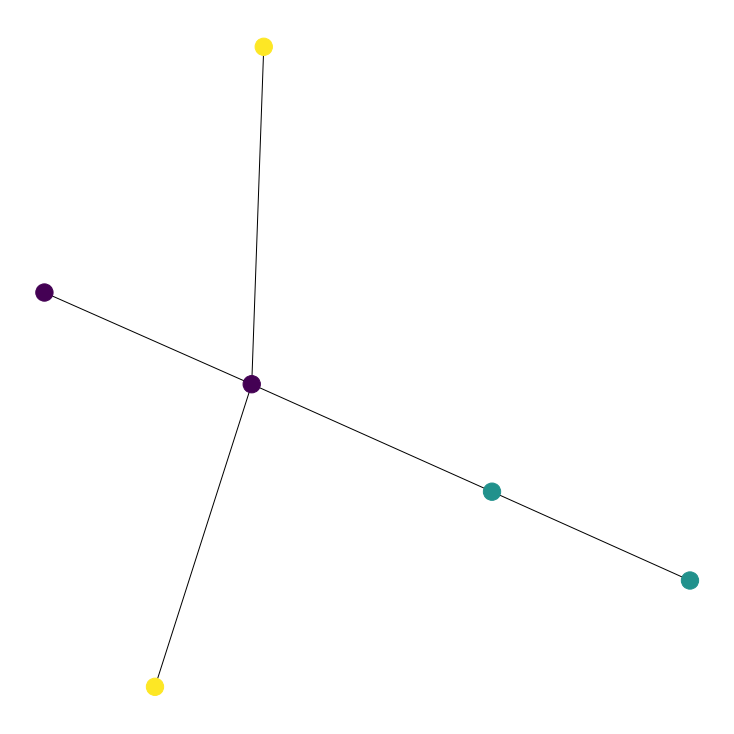

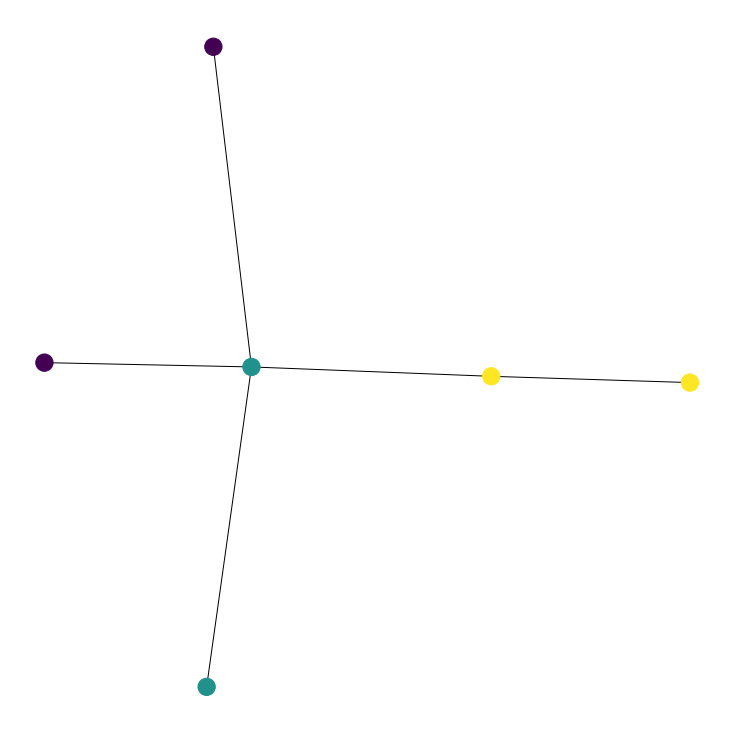

In [14]:
g = nx.Graph()
g.add_nodes_from(range(6))
g.add_edges_from([(0, 1), (1, 2), (2, 3), (4, 1), (5, 1)])
draw_graph_wlabels(g)
nc = 3
r = UnnormalizedSpectral(adj, nc)
draw_graph(g, r)
sc = SpectralClustering(nc, affinity='precomputed', n_init=10, assign_labels='discretize')
r = sc.fit_predict(adj)
draw_graph(g, r)

In [55]:
def get_2_level_overlay(overlay):
    output = []
    for l in overlay:
        if(isinstance(l, list)):
            no_nesting = True
            for e in l:
                if(isinstance(e, list)):
                    no_nesting = False
            if(no_nesting):
                output.append(l)
            else:
                output.extend(get_2_level_overlay(l))
        else:
            output.append(l)
    return output

In [54]:
get_2_level_overlay([[1,[2]],3,4, [5, [6, [7, [8, [9, 10]]]]]])

[1, [2], 3, 4, 5, 6, 7, 8, [9, 10]]

In [58]:
list({1:2, 3:4}.items())

[(1, 2), (3, 4)]